# Лабораторна робота 7

## Завдання 1

Діедральна група $D_{20}$ має ряд нормальних підгруп: 

In [1]:
G = DihedralGroup(20)
[N.order() for N in G.normal_subgroups()]

[40, 20, 20, 20, 10, 4, 2, 5, 1]

Для кожної нормальної підгрупи $N$ побудуйте ендоморфізм $\phi : D_{20} \rightarrow D_{20}$ такий, що $Ker \phi = N$. Задайте його через `PermutationGroupMorphism` і використайте метод `.kernel` як підтвердження. 

___Зауваження___: ядро має бути не __ізоморфне__ підгрупі, а __рівне__ їй.

## Завдання 2

Знайдіть центр та представників класів спряженості для груп $C_{11}, D_{13}, Q_{8}, SL(3, \mathbb{Z}_7)$. Виведіть кількість елементів в кожній групі, кількість класів спряженості та запишіть формулу для них. 

In [1]:
groups = [CyclicPermutationGroup(11), DihedralGroup(13), QuaternionGroup(), SL(2, Integers(7))]
with open(f"task2.txt", "w") as t2:
    for i in groups:
        G = i
        Z_d = G.center()
        t2.write(f"Група {G} \n")
        t2.write(f"Центр: \n {Z_d.list()} \n")
        class_conj = G.conjugacy_classes_representatives()
        count = len(class_conj)
        t2.write(f"Представники класів спряженості: \n {class_conj} \n")
        t2.write(f"Кількість класів спряженості: {count} \n")
        t2.write(f"Порядок групи (к-сть елементів): {G.cardinality()} \n")
        if G == SL(2, Integers(7)):
            sizes = [G.order() / len(G.conjugacy_class(g)) for g in class_conj]
        else:
            sizes = [G.order()/G.centralizer(g).order() for g in G.conjugacy_classes_representatives()]
        t2.write(f"Формула класу: {sizes} \n")
        t2.write(f"{G.order() == sum(sizes)} \n")
print("Successfully saved!")

Successfully saved!


## Завдання 3

1. Побудуйте граф гіперкуба $C_4$ і знайдіть його групу автоморфізмів. Розгляньте цю групу і її дію на граф. Покажіть орбіти цієї групової дії та зробіть висновки. 
2. Знайдіть стабілізатор довільної вершини та розгляньте його як групу з дією на весь граф. Знайдіть орбіти цієї нової групової дії. Зробіть висновки в термінах гіперкуба.

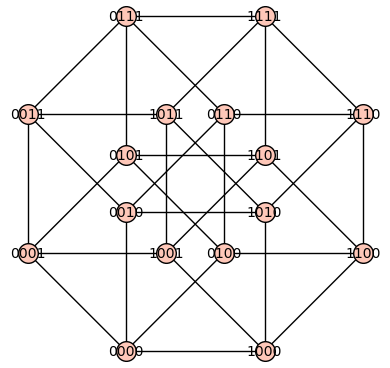

Група автоморфізмів графа: Permutation Group with generators [('1001','1111')('0110','0000')('1000','1110')('0001','0111'), ('1101','0111')('1001','0011')('1100','0110')('0010','1000'), ('0100','0001')('1001','1100')('0110','0011')('1110','1011'), ('0101','0100','1100','1110','1111','0111')('1101','0110')('1001','0010')('1010','1011','0011','0001','0000','1000')]
Орбіти групової дії:
('0101', '0100', '0001', '1100', '0111', '0000', '0110', '1001', '1110', '1101', '1000', '0011', '1111', '0010', '1011', '1010')
Кількість орбіт: 1
Порядок групи автоморфізмів: 384
((((C2 x C2 x C2) : (C2 x C2)) : C3) : C2) : C2


In [2]:
G = graphs.CubeGraph(4)
G.show()
aut_group = G.automorphism_group()
print("Група автоморфізмів графа:", aut_group)
orb = aut_group.orbits()
print("Орбіти групової дії:")
for i in orb:
    print(i)
print("Кількість орбіт:", len(orb))
print("Порядок групи автоморфізмів:", aut_group.cardinality())
print(aut_group.structure_description())

In [3]:
v = '0011'
stbl = aut_group.stabilizer(v)
print(f"Стабілізатор вершини {v}: \n", stbl)
orb_v = stbl.orbits()
print("Орбіти групової дії:")
for i in orb_v:
    print(i)
print("Кількість орбіт стабілізатора: ", len(orb_v))
print(stbl.cardinality())
print(stbl.structure_description())

Стабілізатор вершини 0011: 
 Subgroup generated by [('1001','1111')('0110','0000')('1000','1110')('0001','0111'), ('0100','1101')('1001','0000')('0110','1111')('0010','1011'), ('0101','0110')('1101','1110')('1001','1010')('0010','0001')] of (Permutation Group with generators [('1001','1111')('0110','0000')('1000','1110')('0001','0111'), ('1101','0111')('1001','0011')('1100','0110')('0010','1000'), ('0100','0001')('1001','1100')('0110','0011')('1110','1011'), ('0101','0100','1100','1110','1111','0111')('1101','0110')('1001','0010')('1010','1011','0011','0001','0000','1000')])
Орбіти групової дії:
('0101', '0110', '0000', '1111', '1001', '1010')
('0100', '1101', '1110', '1000')
('1100',)
('0010', '0001', '1011', '0111')
('0011',)
Кількість орбіт стабілізатора:  5
24
S4


### Висновок
---
* будь-яку вершину графа можна перевести в будь-яку іншу за домогою дії групи автоморфізмів (к-сть орбіт 1)
* граф гіперкуба є симетричним
* кожна вершина має степінь 4 **-->** граф регулярний
* складна структура групи, бо *structure_description()* дуже якийсь громіздкий
---
* порядок стабілізатора вершин 0011 дорівнює 24, його структора відповідає групі $S_4$ (симетрична група підстановок)
* стабілізатор не є тривіальним

## Завдання 4

1. Знайдіть прості графи з найменшою к-тю вершин, в яких групи автоморфізмів ізоморфні $A_2$ і $A_3$ відповідно. 
2. (додаткова) Зробіть те саме для $A_4$ i $A_5$. 

Група автоморфізмів графа G1: Permutation Group with generators [()]


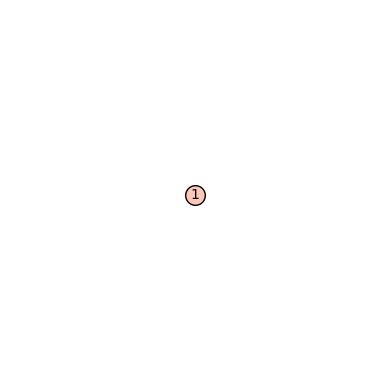

True
Група автоморфізмів графа G1: Permutation Group with generators [()]


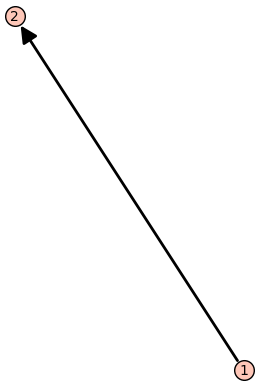

True


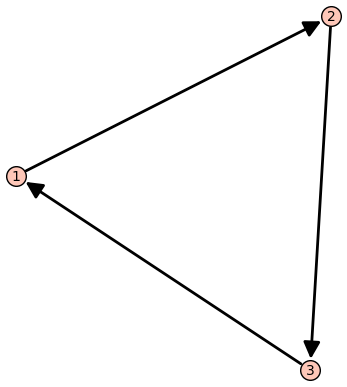

Група автоморфізмів графа G2: Permutation Group with generators [(1,2,3)]
True


In [5]:
# A2 = {e}, порядок групи 1
# тривіальний граф
G1 = Graph()
G1.add_vertex(1)
A = AlternatingGroup(2) 
print("Група автоморфізмів графа G1:", G1.automorphism_group())
G1.show()
print(G1.automorphism_group().is_isomorphic(A))

# нетривіальний граф
G1_t = DiGraph([(1, 2)])
A = AlternatingGroup(2) 
print("Група автоморфізмів графа G1:", G1_t.automorphism_group())
G1_t.show()
print(G1_t.automorphism_group().is_isomorphic(A))

# A3 = {e, (1,2,3), (1,3,2)}, порядок групи 3
G2 = DiGraph([(1, 2), (2, 3), (3, 1)])
G2.show()
A3 = AlternatingGroup(3) 
print("Група автоморфізмів графа G2:", G2.automorphism_group())
print(G2.automorphism_group().is_isomorphic(A3))

Група автоморфізмів графа G2: Permutation Group with generators [(2,3), (1,2)]


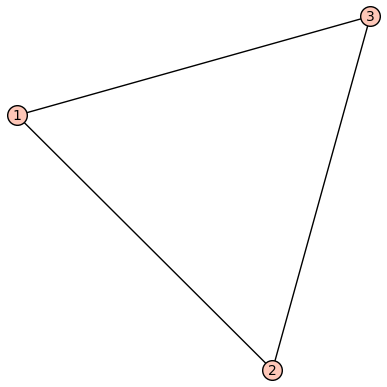

True
Група автоморфізмів графа G2: Permutation Group with generators [(4,5), (3,4), (2,3), (1,2)]


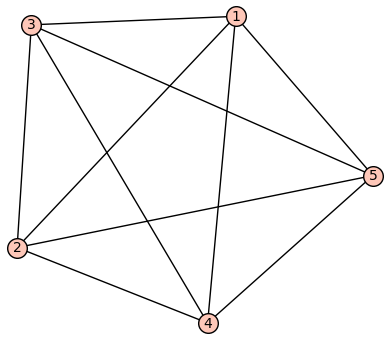

True
Група автоморфізмів графа G2: Permutation Group with generators [(3,4), (2,3), (1,2)]


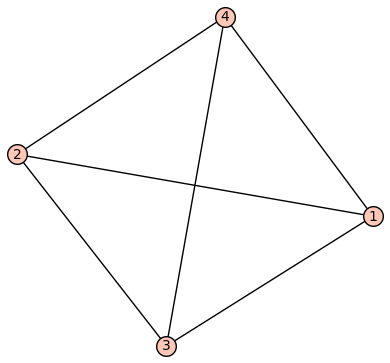

True


In [6]:
# це для себе
G3 = Graph([(1, 2), (2, 3), (3, 1)])
S3 = SymmetricGroup(3)
print("Група автоморфізмів графа G2:", G3.automorphism_group())
G3.show()
print(G3.automorphism_group().is_isomorphic(S3))

# повний граф K5
G5 = Graph([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5)])
S5 = SymmetricGroup(5)
print("Група автоморфізмів графа G2:", G5.automorphism_group())
G5.show()
print(G5.automorphism_group().is_isomorphic(S5))

# повний граф K4
G4 = Graph([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3), (1, 4), (2, 4)])
S4 = SymmetricGroup(4)
print("Група автоморфізмів графа G2:", G4.automorphism_group())
G4.show()
print(G4.automorphism_group().is_isomorphic(S4))

## Завдання 5

Побудуйте простий граф, в якого група автоморфізмів тривіальна. 

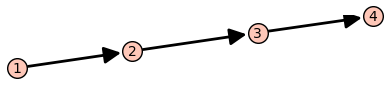

Permutation Group with generators [()]

In [7]:
G = DiGraph([(1, 2), (2, 3), (3, 4)])
G.show()
auto_group = G.automorphism_group()
auto_group

## Завдання 6

1. Побудуйте граф, як показано в коді нижче, і знайдіть його групу автоморфізмів. Розгляньте цю групу і її дію на граф. Покажіть орбіти цієї групової дії та зробіть висновки. 
2. Знайдіть стабілізатор довільної вершини та розгляньте його як групу з дією на весь граф. Знайдіть орбіти цієї нової групової дії. Зробіть висновки в термінах графа.

_Підказка_: намалюйте граф як планарний за допомогою `.plot(layout='planar')` для кращої наочності.

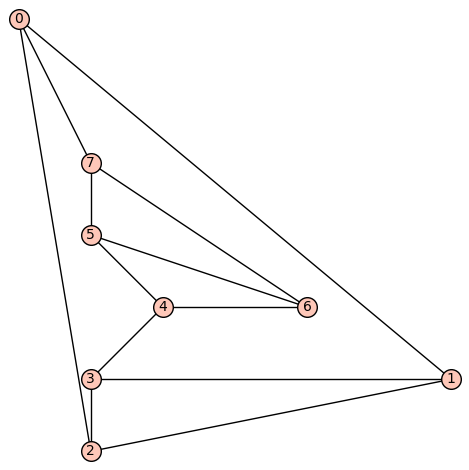

In [8]:
G = graphs.CycleGraph(8)
G.add_edges([(0, 2), (1, 3), (4, 6), (5, 7)])
G.plot(layout='planar')

In [9]:
aut_group = G.automorphism_group()
print("Група автоморфізмів графа:", aut_group)
orbits = aut_group.orbits()
print("Орбіти групової дії:")
for i in orbits:
    print(i)
print("Кількість орбіт:", len(orbits))
print("Порядок групи автоморфізмів:", aut_group.cardinality())
print(aut_group.structure_description())

Група автоморфізмів графа: Permutation Group with generators [(5,6), (1,2), (0,3)(4,7), (0,4)(1,5)(2,6)(3,7)]
Орбіти групової дії:
(0, 3, 4, 7)
(1, 2, 5, 6)
Кількість орбіт: 2
Порядок групи автоморфізмів: 16
C2 x D4


In [10]:
v = G.vertices()[7]
stbl = aut_group.stabilizer(v)
print(f"Стабілізатор вершини {v}: \n", stbl)
orb_v = stbl.orbits()
print("Орбіти групової дії:")
for i in orb_v:
    print(i)
print("Кількість орбіт стабілізатора: ", len(orb_v))
print("Порядок стабілізатора: ", stbl.cardinality())
print(stbl.structure_description())

Стабілізатор вершини 7: 
 Subgroup generated by [(5,6), (1,2)] of (Permutation Group with generators [(5,6), (1,2), (0,3)(4,7), (0,4)(1,5)(2,6)(3,7)])
Орбіти групової дії:
(0,)
(1, 2)
(3,)
(4,)
(5, 6)
(7,)
Кількість орбіт стабілізатора:  6
Порядок стабілізатора:  4
C2 x C2


/var/folders/54/gzvd54k12d132g04brrq6mh40000gn/T/ipykernel_4275/169487329.py:1: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v = G.vertices()[Integer(7)]


### Висновок
---
* граф є регулярним
* структура групи автоморфізмів - циклічна група $C_2$ та діедральна група $D_4$, вони описують перестановки всередині орбіт і симетрії обертання між вершинами орбіт
---
* стабілізатор вершини 7 генерується двома елементами (5, 6), (1, 2) - дві підстановки, тому структура стабілізатора має вигляд $C_2$ x $C_2$